In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class Bandit(object):
    def __init__(self, k, q_star_mean=5, policy='e-greedy-0.1', optimistic_init=15, softmax_temp=0.5):
        self.k = k
        self.rewards_mean = np.random.normal(loc=q_star_mean, size=k)
        self.policy = policy
        self.softmax_temp = softmax_temp
        
        self.default = optimistic_init if policy == 'optimistic_init' else 0

        self.sum_r = np.zeros(k)
        self.sum_r[:] = self.default
        self.q = None
        
        self.pulls = np.zeros(k)
        self.pulls_counter = 0
    
    def pull(self):
        self.pulls_counter += 1
        
        arm = self._pick_arm()
        r = self._reward(arm)
        self._update_q(r, arm)
        
        self.pulls[arm] += 1
        
        return r
    
    def get_max_avg_reward(self):
        return np.max(self._get_q())
    
    def _get_q(self, arm=None):
        if arm is not None:
            return self.sum_r[arm]/self.pulls[arm] if self.pulls[arm] > 0 else self.sum_r[arm]
        if self.q is None or self.last_q_update != self.pulls_counter:
            q = self.sum_r/self.pulls
            q[np.isnan(q)]=self.default
            self.q = q
            self.last_q_update = self.pulls_counter
        return self.q
    
    def _pick_arm(self):
        if self.policy == 'e-greedy-0.1':
            if random.random() < 0.1:
                arm = random.randrange(self.k)
            else:
                arm = np.argmax(self._get_q())
        
        elif self.policy == 'e-greedy-0.01':
            if random.random() < 0.01:
                arm = random.randrange(self.k)
            else:
                arm = np.argmax(self._get_q())
                
        elif self.policy == 'optimistic_init':
            arm = np.argmax(self._get_q())
        
        elif self.policy == 'softmax':
            e_q = np.exp(self._get_q()/self.softmax_temp)
            softmax = e_q / e_q.sum()
            arm = np.random.choice(range(self.k), replace=False, p=softmax)
            
        return arm
                
    def _reward(self, arm):
        return np.random.normal(self.rewards_mean[arm])
    
    def _update_q(self, r, arm):
        if self.pulls[arm] > 0:
            self.sum_r[arm] += r
        else:
            self.sum_r[arm] = r
            

In [3]:
arms = 100
num_pulls = 50000
num_bandits = 2000

## Test

In [4]:
bandits = []
for _ in range(num_bandits):
    bandits.append(Bandit(arms, policy='softmax'))
    
avg_rewards = []

for i in range(num_pulls):
    r_sum = 0
    for bandit in bandits:
        r = bandit.pull()
        r_sum += r #bandit.get_max_avg_reward()
    avg_r = r_sum/num_bandits
    avg_rewards.append(avg_r)
    
    if i % 100 == 0:
        print(i, avg_r)

/Users/volterr/anaconda/envs/rl/lib/python3.6/site-packages/ipykernel/__main__.py:35: RuntimeWarning: invalid value encountered in true_divide


0 4.974430945230825
100 5.458124306475912
200 5.563227641887175
300 5.668267680390416
400 5.693605754004362
500 5.725058887958374
600 5.738756583912841
700 5.833720718784252
800 5.828169195456891
900 5.83668302596347
1000 5.846365301415336
1100 5.863535562211882
1200 5.863310478246374
1300 5.853043864146652
1400 5.924147818831283
1500 5.900333437086938
1600 5.9445576542150675
1700 5.91310763206201
1800 5.912616707268017
1900 5.958071457785968
2000 5.945852582595279
2100 5.9852958276997565
2200 5.9412125517547505
2300 5.970497582220231
2400 5.9898469333848
2500 5.971750693036959
2600 5.974095427632687
2700 6.0172699843781094
2800 5.988864883642459
2900 6.008497535199849
3000 5.969534887683388
3100 6.05591029665379
3200 6.016153741118357
3300 5.994258589556662
3400 6.019233048365185
3500 5.984215683797201
3600 6.04313263853024
3700 6.072835140965437
3800 6.034076528303147
3900 6.051140255377314
4000 6.043081745040575
4100 6.049859393061792
4200 6.106614399945798
4300 6.051616222675156
44

34600 6.306654504974449
34700 6.331446827264098
34800 6.342840338545596
34900 6.336814611268262
35000 6.322262048448545
35100 6.30449664995166
35200 6.370865362272109
35300 6.335195939993572
35400 6.351621488565886
35500 6.3841431144177925
35600 6.268766722202626
35700 6.314627986239151
35800 6.350990367358016
35900 6.323051490241554
36000 6.304315267006164
36100 6.357543899902188
36200 6.322388037013554
36300 6.306460595646966
36400 6.321438208864164
36500 6.280262049959925
36600 6.32533972953123
36700 6.3242935128674365
36800 6.26900049445778
36900 6.314438626639545
37000 6.320004317546311
37100 6.345504958839602
37200 6.31416046443273
37300 6.29451429482814
37400 6.324066536485067
37500 6.319723400027816
37600 6.318664663986265
37700 6.32899234125934
37800 6.32294644920118
37900 6.288878870646595
38000 6.37276548085277
38100 6.331585229680302
38200 6.342613469295174
38300 6.316601317588413
38400 6.341938259778987
38500 6.280907477352694
38600 6.369225415387985
38700 6.34549398413450

In [5]:
df = pd.DataFrame({'avg_reward': avg_rewards})
np.max(avg_rewards)

6.4525989643270512

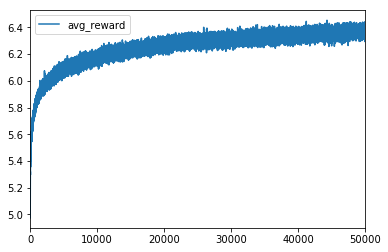

In [6]:
df.plot()
plt.show()